In [2]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
class Node:
    def __init__(self,i,j,g,h,previous,counter):
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        self.f = g + h
        self.previous = previous
        self.counter = counter
        self.isBlocked = False
        self.priority = 10*self.f - g


In [4]:
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    def addNode(self, node):
        self.heap.append(node)
        self._heapifyUp()
        return self.heap

    def getMinNode(self):
        return self.heap[0]
    
    def popMinNode(self):
        if len(self.heap) == 0:
            return None
        else:
            minEle = self.heap[0]
            self.heap[0] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDown()
            return minEle

    def removeNode(self, node):
        z = search(Node)
        if z:
            removed = self.heap[z]
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            return removed
    
    def upsert(self,oldNode,newNode):
        z = self.search(oldNode)
        if z:
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            self.addNode(newNode)
            return self.heap
        else:
            self.addNode(newNode)
            return self.heap
        
    def search(self, node):
        heap = self.heap
        for x in range(0,len(heap)):
            if self.heap[x].i == node.i and self.heap[x].j == node.j:
                return x
                
    def _heapifyUpInd(self, i):
        heap = self.heap
        size = i
        if len(heap) == 1 :
            return heap
        else:
            while size//2 > 0:
                parent = (size)//2 - 1
                curLast = size-1
                if heap[curLast].f < heap[parent].f:
                    swpNode = heap[curLast]
                    heap[curLast] = heap[parent]
                    heap[parent] = swpNode
                size = size//2
            return heap

    def _heapifyUp(self):
        self._heapifyUpInd(len(self.heap))
    
    def _heapifyDownInd(self,ind):
        size = len(self.heap)
        curr = ind
        while (curr+1)*2 <= size:
            minInd = self._nextMinNode(curr)      
            if self.heap[minInd].f < self.heap[curr].f: #should change to priority
                swpNode = self.heap[minInd]
                self.heap[minInd] = self.heap[curr]
                self.heap[curr] = swpNode
            curr = minInd
        return self.heap

    def _heapifyDown(self):
        self._heapifyDownInd(0)

    def _nextMinNode(self, index):
        if (index+1)*2 + 1 > len(self.heap):
            return index*2 + 1 
        else:
            if self.heap[index*2 + 1].f < self.heap[index*2 + 2].f:
                return index*2 + 1
            else:
                return index*2 + 2
    
    def printHeap(self):
        heap = self.heap
        for x in range(0,len(heap)):
            print("i-",heap[x].i,"j-",heap[x].j,"f-",heap[x].f)
        
    def size(self):
        return len(self.heap)


In [5]:
def generate_random_matrix(input,visited,i,j):
    visited[i][j] = 1
    input[i][j] = 1

    if  j + 1 < len(input) and input[i][j+1] == 0: 
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j+1)
        else:
            visited[i][j+1] = 1
            input[i][j+1] = -1
      
    if  j - 1 >= 0 and input[i][j-1] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j-1)
        else:
            visited[i][j-1] = 1
            input[i][j-1] = -1

    if i -1 >=0 and input[i-1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i-1,j)
        else:
            visited[i-1][j] = 1
            input[i-1][j] = -1

    if i + 1 < len(input) and input[i+1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i+1,j)
        else:
            visited[i+1][j] = 1
            input[i+1][j] = -1

def get_rand_value():
    rand_value = random.randint(0,9)
    if rand_value in [0,2]:
        return -1
    else:
        return 1

def get_unvisited_indices(visited):
    for i in range(0,len(visited)):
        for j in range(0,len(visited)):
            if visited[i][j] == 0:
                return i,j
    return -1,-1


In [12]:
def updateCounter(i,j,nodes,counter):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes) and nodes[i][j].counter != counter:
        nodes[i][j].counter = counter
        nodes[i][j].g = sys.maxsize - 1000
        nodes[i][j].f = nodes[i][j].g + nodes[i][j].h
        nodes[i][j].previous = None

def computePath(maze,goal_node,nodes,open_list,counter):
    
    while open_list.size() > 0:
        # print(open_list.printHeap())
        current_node = open_list.popMinNode()
#         print('current node',current_node.i,current_node.j)
        if nodes[goal_node.i][goal_node.j].f > current_node.f:
            i = current_node.i
            j = current_node.j
            updateCounter(i - 1,j,nodes,counter)              
            if i - 1 >= 0 and current_node.g + 1 < nodes[i - 1][j].g and nodes[i - 1][j].isBlocked == False:
                nodes[i - 1][j].g = current_node.g + 1
                nodes[i - 1][j].f = nodes[i - 1][j].g + nodes[i - 1][j].h
                nodes[i - 1][j].previous = nodes[i][j]
                open_list.upsert(nodes[i-1][j],nodes[i-1][j])
          
            updateCounter(i + 1,j,nodes,counter)
            if i + 1 < len(maze) and current_node.g + 1 < nodes[i + 1][j].g and nodes[i + 1][j].isBlocked == False:
                nodes[i + 1][j].g = current_node.g + 1
                nodes[i + 1][j].f = nodes[i + 1][j].g + nodes[i + 1][j].h
                nodes[i + 1][j].previous = nodes[i][j]
                open_list.upsert(nodes[i+1][j],nodes[i+1][j])
          
            updateCounter(i,j - 1,nodes,counter)
            if j - 1 >= 0 and current_node.g + 1 < nodes[i][j - 1].g and nodes[i][j - 1].isBlocked == False:
                nodes[i][j - 1].g = current_node.g + 1
                nodes[i][j - 1].f = nodes[i][j - 1].g + nodes[i][j - 1].h
                nodes[i][j - 1].previous = nodes[i][j]
                open_list.upsert(nodes[i][j-1],nodes[i][j-1])
  
            updateCounter(i,j + 1,nodes,counter)
            if j + 1 < len(maze) and current_node.g + 1 < nodes[i][j + 1].g and nodes[i][j + 1].isBlocked == False:
                nodes[i][j + 1].g = current_node.g + 1
                nodes[i][j + 1].f = nodes[i][j + 1].g + nodes[i][j + 1].h
                nodes[i][j + 1].previous = nodes[i][j]
                open_list.upsert(nodes[i][j+1],nodes[i][j+1])
        else:
            print('Goal node is reached')
            return True
    return False

def updateIsBlocked(nodes,i,j,value):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes):
        nodes[i][j].isBlocked = value

def traverseNodes(goal_node,maze,start_node):
    # Need to add logic to see we have to open the adjacent nodes when the agent
    # is travelling

    node = goal_node
    node_list = list()
    path_visualization_matrix = [0] * len(maze)
    for i in range(0,size):
        path_visualization_matrix[i] = [0] * len(maze)

    while node != start_node:
#         print('traversing nodes in reverse order ',node.i,node.j)
        path_visualization_matrix[node.i][node.j] = 1
        node_list.append(node)
        old_node = node
        node = node.previous
        old_node.previous = None
    path_visualization_matrix[node.i][node.j] = 1
    plt.imshow(path_visualization_matrix)
    plt.show()
    node_list.append(node)
    
#     print('traversing nodes in reverse order ',node.i,node.j)    
    previous_node = node_list.pop()
    maze[previous_node.i][previous_node.j] = 2
        
    while len(node_list) > 0:
        current_node = node_list.pop()
#         print('traversing nodes ',current_node.i,current_node.j)
        if maze[current_node.i][current_node.j] == -1:
            print('Blocked at node ',previous_node.i,previous_node.j)
            current_node = previous_node
            break
        else:
            maze[current_node.i][current_node.j] = 2
            current_node.previous = previous_node
            previous_node = current_node
    plt.imshow(maze)
    plt.show()
    return current_node

def AStarSearch(nodes,current_node,maze,goal_node,open_list):
    counter = 0
    test_k = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        maze[current_node.i][current_node.j] = 2
        current_node.g = 0
        current_node.f = current_node.g + current_node.h
        current_node.counter = counter
        i = current_node.i
        j = current_node.j
        if i - 1 >= 0 and maze[i - 1][j] == -1:
            updateIsBlocked(nodes,i - 1,j,True)
        elif i - 1 >= 0:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].f = nodes[i - 1][j].g + nodes[i - 1][j].h
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = current_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and maze[i + 1][j] == -1:
            updateIsBlocked(nodes,i + 1,j,True)
        elif i + 1 < len(maze):
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].f = nodes[i + 1][j].g + nodes[i + 1][j].h
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = current_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and maze[i][j - 1] == -1:
            updateIsBlocked(nodes,i,j - 1,True)
        elif j - 1 >= 0:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].f = nodes[i][j - 1].g + nodes[i][j - 1].h
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = current_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and maze[i][j + 1] == -1:
            updateIsBlocked(nodes,i,j + 1,True)
        elif j + 1 < len(maze):
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].f = nodes[i][j + 1].g + nodes[i][j + 1].h
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = current_node
            open_list.addNode(nodes[i][j+1])

        goal_node.g = sys.maxsize - 1000
        goal_node.f = goal_node.g
        can_reach = computePath(maze,goal_node,nodes,open_list,counter)
        open_list = MinHeap()
        if can_reach == False:
            print('cannot reach destination')
            break
        current_node = traverseNodes(goal_node,maze,current_node)
#         print('new current node is',current_node.i,current_node.j)




[[1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1], [1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1], [1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1], [1, 1, 1, 1, 1, 

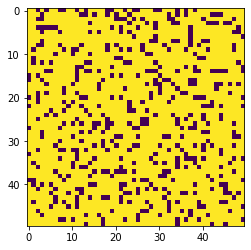

Goal node is reached


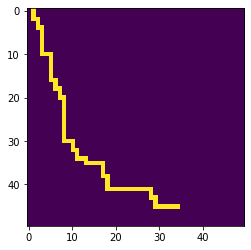

Blocked at node  2 1


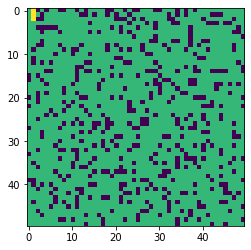

Goal node is reached


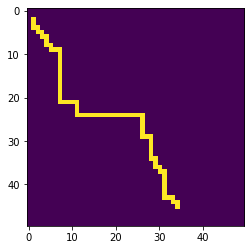

Blocked at node  4 1


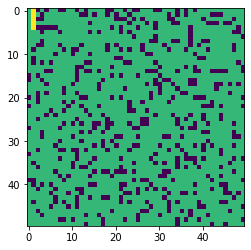

Goal node is reached


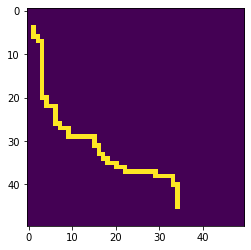

Blocked at node  7 2


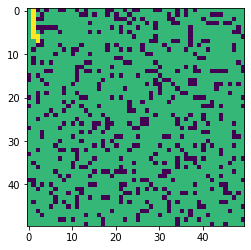

Goal node is reached


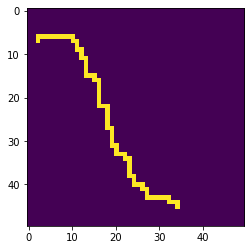

Blocked at node  8 11


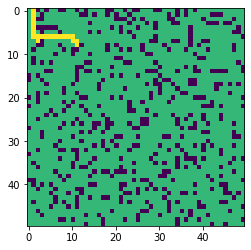

Goal node is reached


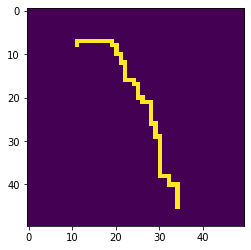

Blocked at node  8 19


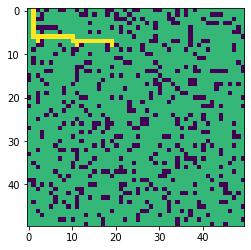

Goal node is reached


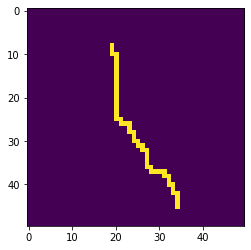

Blocked at node  10 20


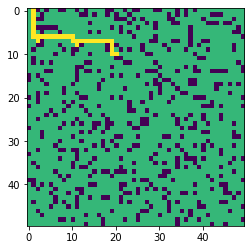

Goal node is reached


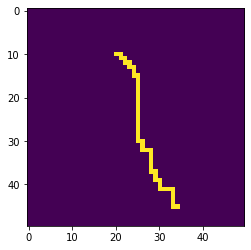

Blocked at node  10 21


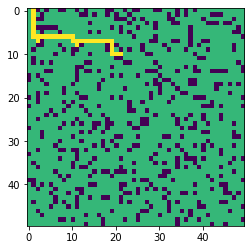

Goal node is reached


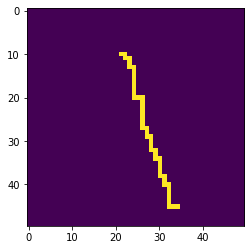

Blocked at node  11 23


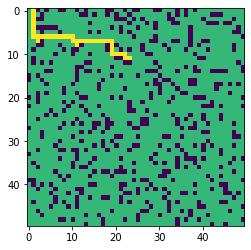

Goal node is reached


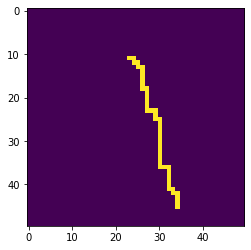

Blocked at node  22 27


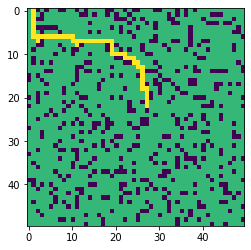

Goal node is reached


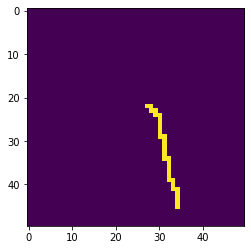

Blocked at node  23 29


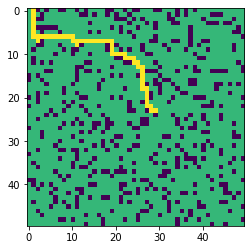

Goal node is reached


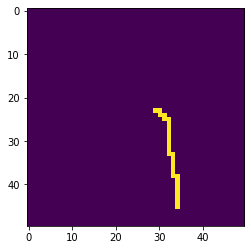

Blocked at node  28 32


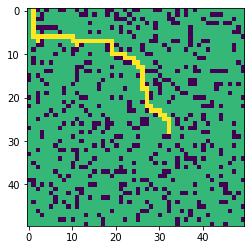

Goal node is reached


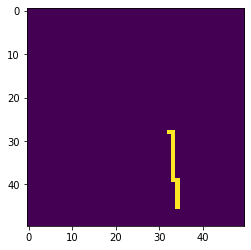

Blocked at node  38 33


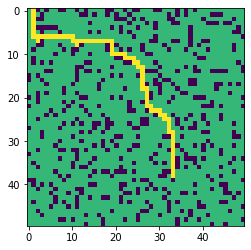

Goal node is reached


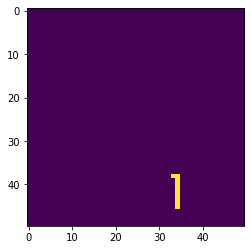

Blocked at node  43 34


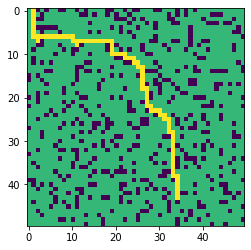

Goal node is reached


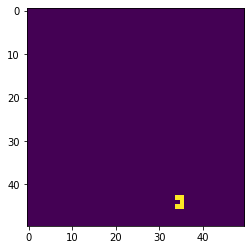

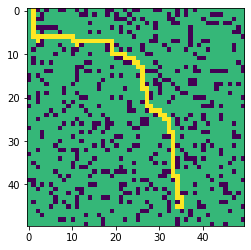

[[1, 2, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1], [1, 2, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1], [1, 2, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 2, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1], [1, 2, 2, 2, 2, 

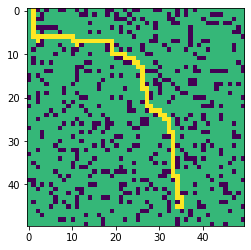

In [15]:

size = 50
maze = [0] * size
visited = [0] * size

for i in range(0,size):
    maze[i] = [0] * size

for i in range(0,size):
    visited[i] = [0] * size

i = 0
j = 0

while True:
    generate_random_matrix(maze,visited,i,j)
    i,j = get_unvisited_indices(visited)
    if i == -1 and j == -1:
        break


maze = [[1, -1, 1, 1, 1], [1, 1, 1, 1, 1], [-1, 1, -1, 1, -1], [1, 1, 1, -1, -1], [1, 1, 1, 1, 1]]
# maze = [[1, 1, 1, 1, 1], [1, -1, 1, 1, -1], [1, 1, 1, -1, 1], [1, -1, -1, 1, 1], [1, 1, 1, 1, 1]]
# maze = [[1, 1, 1, -1, 1], [-1, -1, 1, -1, 1], [1, -1, 1, 1, -1], [1, -1, 1, 1, -1], [1, 1, 1, 1, 1]]
# maze = [[1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1], [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1], [1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1], [-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1], [1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1]]

nodes = [0] * size

source_i = 0
source_j = 1

destination_i = 45
destination_j = 34
for i in range(0,size):
    nodes[i] = [0] * size

for i in range(0,size):
    for j in range(0, size):
        nodes[i][j] = Node(i,j,sys.maxsize - 1000,(destination_i - 1 - i) + (destination_j -1 - j),None,-1)
#         print(type(nodes[i][j]))


# from queue import PriorityQueue
# open_list = PriorityQueue()
open_list = MinHeap()
print(maze)

initial_maze = np.array(maze)

plt.imshow(initial_maze)
plt.show()


AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list)

print(maze)
maze = np.array(maze)

plt.imshow(maze)
plt.show()



    



    




# New Section